# Analysis

> Use NLP to sort the entries in the 'Other Interests' column into categories.

In [328]:
# First, let's load the data and inspect the first few rows
import pandas as pd

data = pd.read_csv('cleaned.csv')

# Create the new columns
keywords = {
    'Archaeology/Anthropology': ['archaeology', 'anthropology'],
    'Religious Studies': ['religion', 'religious', 'theology', 'biblic'],
    'Family History': ['family', 'ancestors', 'genealogy', 'parent', 'sister', 'brother', 'home children'],
    'Local History': ['local', 'railway', 'community'],
    'Social Studies': ['social', 'society', 'studies', 'ethnic', 'humanities', 'sexuality', 'youth', 'equality'],
    'Social Science': ['psychotherapy'],
    'Music': ['music'],
    'Science': ['engineering', 'physics', 'chemistry', 'biology', 'science', 'math']
}
for category, words in keywords.items():
    checks = []
    for value in data['Other Interest']:
        check = False
        for word in words:
            check = word in str(value)
            if check == True:
                break
        checks.append(check)
    data[category] = checks
# Convert boolean to int
for category in keywords.keys():
    data[category] = data[category].astype(int)

# Drop the 'Other Interest' column
data = data.drop(columns=['Other Interest'])


Now, the data is ready for further analysis or modeling with a more structured representation of the interests.

> Use NLP to sort the entries in the 'Other Identifiers' column into categories.

In [329]:
# First, we need to replace the 'Other Identifications' entries with the respective categories.
# I'll follow the similar text matching approach explained before:

# I'll create a keyword mapping to categories
identifiers_keywords = {
    'Retired': ['retired'],
    'Historical Society': ['historical society'],
    'Independent Researcher': ['independant', 'independent'],
    'Scholar': ['scholar'],
    'Editor': ['editor'],
    'Writer': ['writer'],
    'Historian': ['historian'],
    'Journalist': ['journalist'],
    'Researcher': ['researcher', 'research'],
    'Cinematographer': ['cinematographer','youtuber'],
    'Educator' : ['educator', 'professor', 'teacher'],
    'Enthusiast' : ['enthusiast', 'amateur']
}

# Create the new columns for each category
for identifier, words in identifiers_keywords.items():
    checks = []
    for value in data['Other Identification']:
        check = False
        for word in words:
            check = word in str(value)
            if check == True:
                break
        checks.append(check)
    data[identifier] = checks

# Convert boolean to int
for identifier in identifiers_keywords.keys():
    data[identifier] = data[identifier].astype(int)

# Drop the 'Other Identification' column
data = data.drop(columns=['Other Identification'])


Now, the 'Other Identifiers' column is now broken down to specific categories which should be more insightful and manageable for analysis.

> Determine the columns that have to do with occupations and the columns that have to do with interests

In [330]:
occupations_columns = [
    'Genealogical researcher', 
    'GLAM professional', 
    'Government employee', 
    'Legal researcher', 
    'Member of the general public', 
    'Post-secondary researcher', 
    'Student', 
    'Teacher', 
    'Retired',
    'Historical Society',
    'Independent Researcher',
    'Scholar',
    'Editor',
    'Writer',
    'Historian',
    'Journalist',
    'Cinematographer',
    'Educator',
    'Enthusiast'
]

interests_columns = [
    'Computer Science',
    'Digital Humanities',	
    'Education',	
    'Environment/Climate',
    'Gender Studies',
    'Genealogy',
    'Geography',
    'Health',
    'History',
    'Indigenous Land Claims',
    'Indigenous Studies',
    'Information Science',
    'Law',
    'Linguistics',
    'Literature',
    'Political Science',
    'Archaeology/Anthropology',
    'Religious Studies',
    'Family History',
    'Local History',
    'Social Studies',
    'Social Science',
    'Science'
]

occupations_columns, interests_columns

occupations_columns.sort()

interests_columns.sort()

> Create a bar chart showing the count of the different occupations

In [331]:
# The first step is to get the count of each occupation. 
# The occupations_columns contains the names of the occupation columns in the dataset.
occupation_counts = data[occupations_columns].sum()

occupation_counts.sort_values(ascending=False)

Genealogical researcher         1046
Member of the general public     945
Student                          470
Post-secondary researcher        308
GLAM professional                155
Teacher                          132
Government employee               86
Legal researcher                  84
Historian                         35
Retired                           23
Writer                            19
Educator                          14
Independent Researcher            12
Journalist                         7
Historical Society                 7
Enthusiast                         7
Editor                             5
Scholar                            2
Cinematographer                    2
dtype: int64

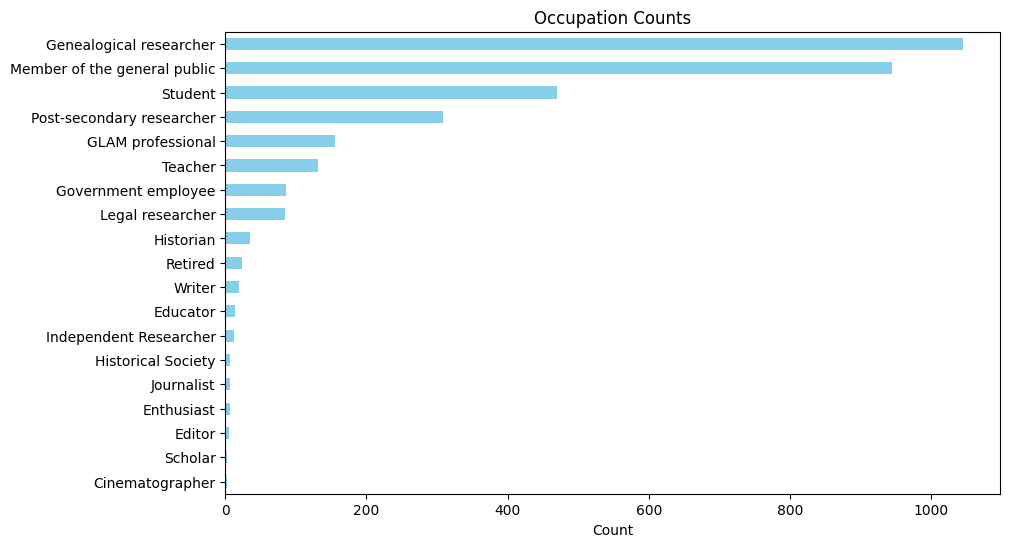

In [332]:
# Now, let's plot a bar chart of the occupation counts
import matplotlib.pyplot as plt 

plt.figure(figsize=(10,6)) 
occupation_counts.sort_values().plot(kind='barh', color='skyblue') 
plt.xlabel('Count')
plt.title('Occupation Counts')
plt.show()


> Create a bar chart showing the count of the different interests

In [333]:
# The first step is to get the count of each interest. 
# The interests_columns contains the names of the interests columns in the dataset.
interest_counts = data[interests_columns].sum()

interest_counts.sort_values(ascending=False)

History                     1537
Genealogy                   1183
Indigenous Studies           338
Geography                    259
Education                    207
Law                          193
Indigenous Land Claims       190
Literature                   166
Digital Humanities           163
Political Science            160
Environment/Climate          150
Health                        98
Gender Studies                81
Linguistics                   80
Information Science           79
Computer Science              74
Social Studies                21
Religious Studies             19
Local History                 14
Science                       14
Archaeology/Anthropology      11
Family History                 4
Social Science                 1
dtype: int64

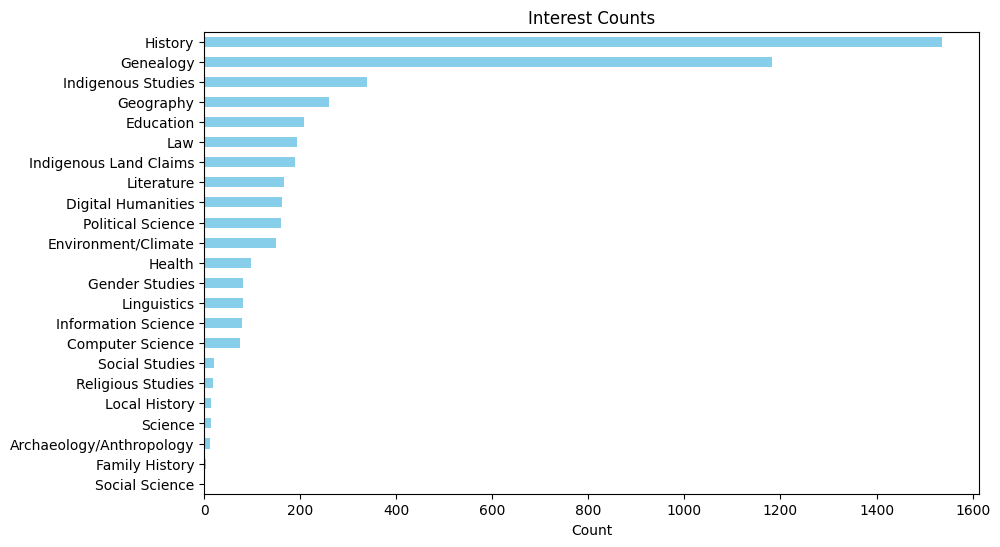

In [334]:
# Now, let's plot a bar chart of the interest counts

plt.figure(figsize=(10,6)) 
interest_counts.sort_values().plot(kind='barh', color='skyblue') 
plt.xlabel('Count')
plt.title('Interest Counts')
plt.show()

> Compare peoples occupation to their interests

In [335]:
# First, let's get a sense of how are occupations related to interests
# For this, I will create a cross-correlation matrix between occupations and interests.
# This matrix will measure the linear relationships between each pair of occupation and interest.
 
# Getting relevant columns
occupations_data = data[occupations_columns]
interests_data = data[interests_columns]

# Concatenating the data
combined_data = pd.concat([occupations_data, interests_data], axis=1)

correlation_matrix = combined_data.corr()

# Selecting only the correlations between occupations and interests
occupation_interest_correlation = correlation_matrix.loc[occupations_columns, interests_columns]

The above correlation matrix displays the linear relationship between occupations and interests from the DataFrame.

> Create a heat map showing the relationship between occupations and interests

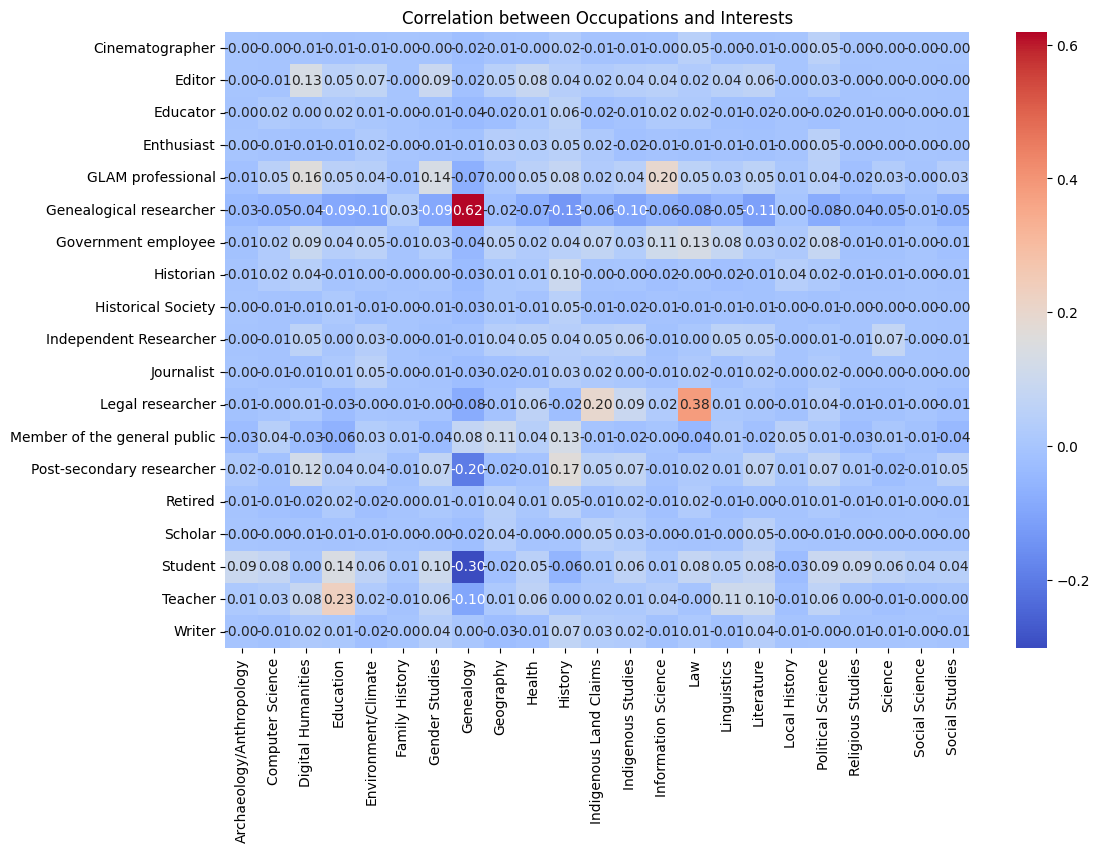

In [336]:
# For visualizing the relationship between occupations and interests, we can create a heatmap using seaborn.
# Heatmap will use the correlation matrix that we computed before.

import seaborn as sns

plt.figure(figsize=(12,8))
sns.heatmap(occupation_interest_correlation, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation between Occupations and Interests')
plt.show()

Legend:
Dark red represent a strong positive relationship between specific occupations and interests. 
Areas that are navy blue represent a strong negative relationship between an occupation and an interest. Areas that are light colored (around zero) represent a weak or no relationship between the variables. 

> plot the entire dataset of people on a map displaying the counts per city

In [337]:
# Now, let's group the data by city and get the count of people in each city
people_counts = data.groupby(['city', 'latitude', 'longitude']).size().reset_index(name='counts')

In [338]:
# Import the folium package
import folium

# Create an initial map, we are going to start with a blank map centered around (0,0)
m = folium.Map(location=[0, 0], zoom_start=1)

# Using folium.Circle, add a cirle for each city in people_counts DataFrame
# The size of the circle corresponds to the count of people in the city
for _, row in people_counts.iterrows():
    folium.Circle(
        location=[row['latitude'], row['longitude']],
        radius=float(row['counts']) * 1000,  # Multiply by 1000 to make the circles visible
        fill=True,
        tooltip=f"{row['city']}: {row['counts']} people"
    ).add_to(m)

# Display the map
m

> what are the most common interests for each occupation in the dataset

In [339]:
# For each occupation, let's find out the most common interest
occupation_interests = {}

for occupation in occupations_columns:
    # Calculate the sum of people with this occupation having each interest
    coi = data[data[occupation] == 1][interests_columns].sum()
    # Find the most common interest
    most_common_interest = coi.idxmax()
    occupation_interests[occupation] = most_common_interest

occupation_interests

{'Cinematographer': 'History',
 'Editor': 'History',
 'Educator': 'History',
 'Enthusiast': 'History',
 'GLAM professional': 'History',
 'Genealogical researcher': 'Genealogy',
 'Government employee': 'History',
 'Historian': 'History',
 'Historical Society': 'History',
 'Independent Researcher': 'History',
 'Journalist': 'History',
 'Legal researcher': 'Law',
 'Member of the general public': 'History',
 'Post-secondary researcher': 'History',
 'Retired': 'History',
 'Scholar': 'Geography',
 'Student': 'History',
 'Teacher': 'History',
 'Writer': 'History'}

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=78bfc222-b866-4a43-b8a8-c2a8d5467ce5' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>